In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


<AxesSubplot:>

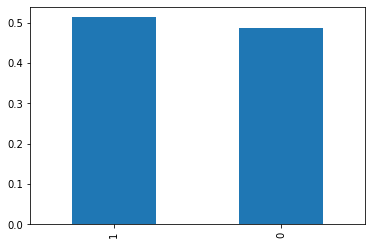

In [4]:
data.target.value_counts(normalize=True).plot(kind='bar')

In [5]:
data=data.sample(frac=1).reset_index(drop=True)

In [6]:
df=data[data['age']%2==0]

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.00000,526.000000,526.000000
mean,54.752852,0.712928,0.986692,131.287072,243.840304,0.169202,0.532319,149.587452,0.315589,1.084791,1.346008,0.80038,2.332700,0.519011
std,8.509252,0.452826,1.026234,18.043527,44.755815,0.375287,0.525449,23.581247,0.465193,1.172802,0.648847,1.06193,0.639609,0.500114
min,34.000000,0.000000,0.000000,100.000000,141.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,154.000000,0.000000,0.800000,1.000000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,168.000000,1.000000,1.800000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.00000,3.000000,1.000000


In [8]:
df=df.reset_index(drop=True)

In [9]:
df2=data[data['age']%3==0]
df2=df2.reset_index(drop=True)

In [10]:
df2.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
335,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
336,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
337,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
338,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
339,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0


In [11]:
x=df.iloc[:,df.columns!='target'].values
y=df['target'].values

In [12]:
x2=df2.iloc[:,df2.columns!='target'].values
y2=df2['target'].values

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
x2=ss.fit_transform(x2)

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
x_train2,x_test2,y_train2,y_test3=train_test_split(x2,y2)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [16]:
rf=RandomForestClassifier()
xg=XGBClassifier()

In [17]:
xg.fit(x_train,y_train)

[16:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
xg.fit(x_train2,y_train2)

[16:36:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [19]:
pred1=xg.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,f1_score
f1_score(pred1,y_test)

0.8484848484848485

In [21]:
pred2=xg.predict(x_test2)

In [22]:
f1_score(pred2,y_test3)

0.9577464788732395

In [24]:
df3=data[data['chol']%2==0]

In [25]:
df3=df3.reset_index(drop=True)
df3.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
498,51,1,2,100,222,0,1,143,1,1.2,1,0,2,1
499,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
500,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
501,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
502,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1


In [26]:
x2=df3.iloc[:,df3.columns!='target']
y2=df3['target']

In [28]:
x2=ss.fit_transform(x2)

In [29]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2)

In [30]:
xg.fit(x_train2,y_train2)

[16:42:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
an=xg.predict(x_test2)

In [33]:
f1_score(an,y_test2)

0.9763779527559054

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train2,y_train2)

RandomForestClassifier()

In [35]:
ans=rf.predict(x_test2)

In [36]:
f1_score(ans,y_test2)

1.0

<AxesSubplot:>

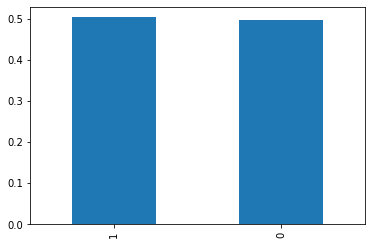

In [38]:
df3.target.value_counts(normalize=True).plot(kind='bar')

In [39]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
1,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0
2,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
3,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
4,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0


In [41]:
X=data.iloc[:,data.columns!='target']
Y=data['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,62,0,0,160,164,0,0,145,0,6.2,0,3,3
1,38,1,3,120,231,0,1,182,1,3.8,1,0,3
2,58,0,0,130,197,0,1,131,0,0.6,1,0,2
3,48,1,1,130,245,0,0,180,0,0.2,1,0,2
4,61,1,3,134,234,0,1,145,0,2.6,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,70,1,0,130,322,0,0,109,0,2.4,1,3,2
1021,38,1,3,120,231,0,1,182,1,3.8,1,0,3
1022,62,0,0,124,209,0,1,163,0,0.0,2,0,2
1023,41,1,1,135,203,0,1,132,0,0.0,1,0,1


In [44]:
x_trains,x_tests,y_trains,y_tests=train_test_split(X,Y,random_state=2)

In [45]:
x_trains

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
365,55,1,0,160,289,0,0,145,1,0.8,1,1,3
22,57,0,0,140,241,0,1,123,1,0.2,1,0,3
397,62,0,0,140,394,0,0,157,0,1.2,1,0,2
432,66,0,2,146,278,0,0,152,0,0.0,1,1,2
188,56,1,0,132,184,0,0,105,1,2.1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,52,1,2,172,199,1,1,162,0,0.5,2,0,3
534,64,0,2,140,313,0,1,133,0,0.2,2,0,3
584,47,1,0,112,204,0,1,143,0,0.1,2,0,2
493,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [46]:
x_tests

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
546,60,1,0,130,206,0,0,132,1,2.4,1,2,3
980,51,1,2,94,227,0,1,154,1,0.0,2,1,3
908,55,0,0,180,327,0,2,117,1,3.4,1,0,2
577,61,0,0,130,330,0,0,169,0,0.0,2,0,2
846,58,1,1,125,220,0,1,144,0,0.4,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,57,0,1,130,236,0,0,174,0,0.0,1,1,2
441,57,1,1,154,232,0,0,164,0,0.0,2,1,2
763,69,0,3,140,239,0,1,151,0,1.8,2,2,2
656,56,1,1,130,221,0,0,163,0,0.0,2,0,3


In [47]:
y_trains

365    0
22     0
397    1
432    1
188    0
      ..
299    1
534    1
584    1
493    1
527    0
Name: target, Length: 768, dtype: int64

In [48]:
y_tests

546     0
980     1
908     0
577     0
846     1
       ..
1008    0
441     0
763     1
656     1
551     1
Name: target, Length: 257, dtype: int64

In [55]:
randoms=[1,1,4,6,3]
scores=[]
X=ss.fit_transform(X)
for i in randoms:
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=i)
    xg.fit(X_train,Y_train)
    ans=xg.predict(X_test)
    scores.append(f1_score(ans,Y_test))

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:03:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [56]:
scores

[0.9877551020408163, 0.9877551020408163, 1.0, 0.9877551020408163, 1.0]